Data Source: https://multimil.readthedocs.io/en/latest/notebooks/mil_classification.html

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Download data

In [ ]:
data_path = "hlca_tutorial.h5ad"

import gdown

gdown.download("https://drive.google.com/uc?export=download&id=1wWGwbPeap-IqWNVlwVVUWVrUAMrf45ye")
adata = sc.read_h5ad(data_path)

adata

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1wWGwbPeap-IqWNVlwVVUWVrUAMrf45ye
From (redirected): https://drive.google.com/uc?export=download&id=1wWGwbPeap-IqWNVlwVVUWVrUAMrf45ye&confirm=t&uuid=b6879041-ce35-47cf-8ef9-984c70d474cd
To: /content/hlca_tutorial.h5ad
100%|██████████| 118M/118M [00:01<00:00, 67.4MB/s]


NameError: name 'sc' is not defined

In [ ]:
!mv '/content/hlca_tutorial.h5ad' '/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/data/HCLA/hcla_tutoral.h5ad'

In [ ]:
!curl https://datasets.cellxgene.cziscience.com/8d84ba15-d367-4dce-979c-85da70b868a2.h5ad -o '/content/drive/MyDrive/Samin/Pathological Cell Identification/data/HCLA/data.h5ad'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
 21 20.3G   21 4379M    0     0  11.3M      0  0:30:43  0:06:27  0:24:16 13.0M

## Explore data

In [2]:
!pip install git+https://github.com/SaminRK/scPSS.git

  Cloning https://github.com/SaminRK/scPSS.git to /tmp/pip-req-build-6u2vq0az
  Running command git clone --filter=blob:none --quiet https://github.com/SaminRK/scPSS.git /tmp/pip-req-build-6u2vq0az
  Resolved https://github.com/SaminRK/scPSS.git to commit 4a89b6f4ad35328a5f2a8235ca461272b2713007
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 5.9 MB/s eta 0:00:00
  Created wheel for scPSS: filename=scPSS-0.1.0-py3-none-a

In [3]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
ad_total = sc.read('/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/data/HCLA/hcla_tutoral.h5ad')

/usr/local/lib/python3.10/dist-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [5]:
ad_normal = ad_total[ad_total.obs['disease'] == 'normal']
ad_disease = ad_total[ad_total.obs['disease'] == 'pulmonary fibrosis']

In [6]:
ad_normal

View of AnnData object with n_obs × n_vars = 210262 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [7]:
ad_disease

View of AnnData object with n_obs × n_vars = 239952 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [8]:
len(ad_normal.obs['donor_id'].unique()), len(ad_disease.obs['donor_id'].unique())

(59, 52)

In [9]:
ad_total

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [10]:
celltype = 'AT2'

In [11]:
ad = ad_total[ad_total.obs['ann_level_3_label_final'] == celltype]

In [12]:
ad

View of AnnData object with n_obs × n_vars = 25154 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

## Explore each cell type separately

In [13]:
SAMPLE_SIZE = 100000
if len(ad) > SAMPLE_SIZE: sc.pp.subsample(ad, n_obs=SAMPLE_SIZE)

In [14]:
ad

View of AnnData object with n_obs × n_vars = 25154 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [15]:
sc.tl.pca(ad)

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.10/dist-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.10/dist-packages/scanpy/plotting

[<Axes: title={'center': 'disease'}, xlabel='PC1', ylabel='PC2'>,
 <Axes: title={'center': 'sample'}, xlabel='PC1', ylabel='PC2'>]

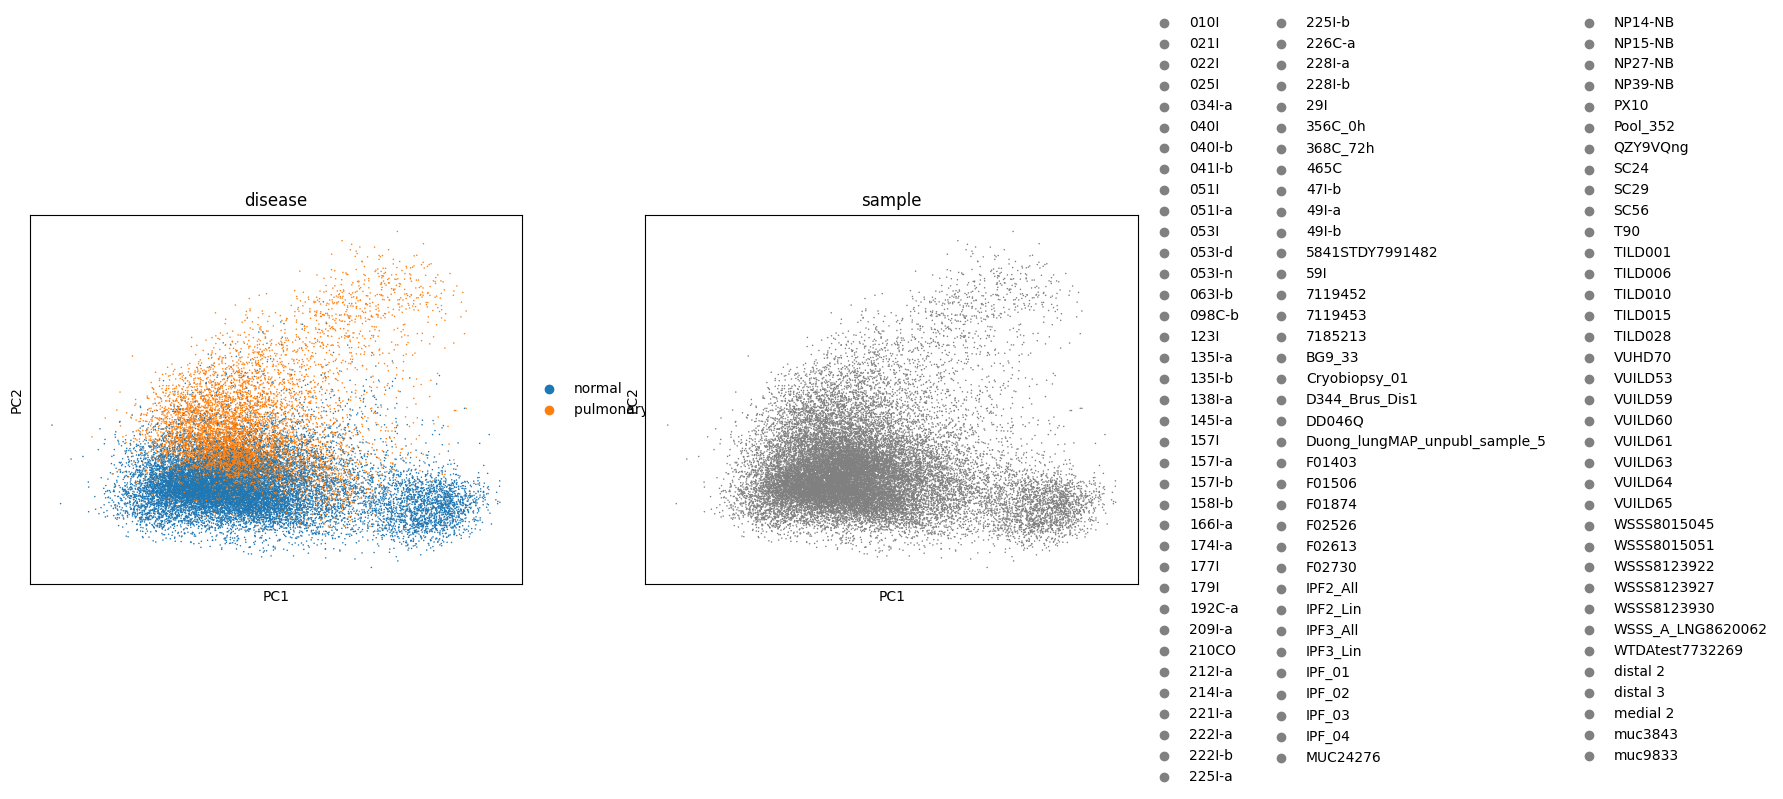

In [16]:
sc.pl.pca(ad, color=['disease', 'sample'], show=False)

## Problem scenario: Only healthy reference available

In [17]:
ad_normal = ad_total[ad_total.obs['disease'] == 'normal']
ad_disease = ad_total[ad_total.obs['disease'] == 'pulmonary fibrosis']

In [18]:
ad_normal

View of AnnData object with n_obs × n_vars = 210262 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [19]:
ad_disease

View of AnnData object with n_obs × n_vars = 239952 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'ann_level_1_label_final', 'ann_level_2_label_final', 'ann_level_3_label_final', 'ann_level_4_label_final', 'ann_level_5_label_final'
    obsm: 'X_umap'

In [20]:
DONOR_KEY = 'donor_id'

In [21]:
normal_donor_ids = list(ad_normal.obs[DONOR_KEY].unique())
disease_donor_ids = list(ad_disease.obs[DONOR_KEY].unique())

In [22]:
def get_upper_limit(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    upper_limit_from_data = q1
    for d in data:
        if d < upper_limit and d > upper_limit_from_data:
            upper_limit_from_data = d

    return upper_limit_from_data

In [23]:
import random
import scanpy as sc
from scpss import scPSS

def process(seed):
    random.seed(seed)

    ref_normal_num_donors = len(normal_donor_ids) * 1 // 2
    ref_disease_num_donors = len(disease_donor_ids) * 1 // 2
    ref_normal_donor_ids = random.sample(normal_donor_ids, ref_normal_num_donors)
    que_normal_donor_ids = [s for s in normal_donor_ids if s not in ref_normal_donor_ids]
    ref_disease_donor_ids = random.sample(disease_donor_ids, ref_disease_num_donors)
    que_disease_donor_ids = [s for s in disease_donor_ids if s not in ref_disease_donor_ids]

    que_donor_ids = que_normal_donor_ids + que_disease_donor_ids

    ad_scpss = ad[ad.obs[DONOR_KEY].isin(ref_normal_donor_ids + que_donor_ids)]
    sc.tl.pca(ad_scpss)

    ref_normal_samples = ad_scpss[ad_scpss.obs[DONOR_KEY].isin(ref_normal_donor_ids)].obs['sample'].unique()
    que_samples = ad_scpss[ad_scpss.obs[DONOR_KEY].isin(que_donor_ids)].obs['sample'].unique()

    scpss = scPSS(ad_scpss, 'sample', ref_normal_samples, que_samples)
    scpss.harmony_integrate(max_iter_harmony=10)
    scpss.find_optimal_parameters(search_n_comps=np.arange(4, 16), verbose=True)
    params = scpss.best_params
    scpss.set_distance_and_condition()

    outlier_ratio_ref_datasets = []
    outlier_ratio_que_datasets = []

    all_distances = scpss.ad.obs['scpss_distances']
    thres = scpss.best_params['threshold']

    for donor in ref_normal_donor_ids:
        dist = all_distances[scpss.ad.obs[DONOR_KEY] == donor]
        if len(dist) > 0: outlier_ratio_ref_datasets.append(np.mean(dist > thres))
        else: outlier_ratio_ref_datasets.append(None)

    for donor in que_donor_ids:
        dist = all_distances[scpss.ad.obs[DONOR_KEY] == donor]
        if len(dist) > 0: outlier_ratio_que_datasets.append(np.mean(dist > thres))
        else: outlier_ratio_que_datasets.append(None)

    def filter_nones(l):
        return [x for x in l if x is not None]

    outlier_ratio_ref_filtered = filter_nones(outlier_ratio_ref_datasets)
    outlier_ratio_que_filtered = filter_nones(outlier_ratio_que_datasets)

    ratio_limit = get_upper_limit(outlier_ratio_ref_filtered)

    print('Limit:', ratio_limit)

    dist_ref_ref = all_distances[scpss.ad.obs[scpss.sample_key].isin(scpss.reference_samples)]
    dist_que_ref = all_distances[scpss.ad.obs[scpss.sample_key].isin(scpss.query_samples)]

    dist_healthy = all_distances[
        scpss.ad.obs[scpss.sample_key].isin(scpss.query_samples) &
        scpss.ad.obs['disease'].isin(['normal'])
    ]
    dist_disease = all_distances[
        scpss.ad.obs[scpss.sample_key].isin(scpss.query_samples) &
        scpss.ad.obs['disease'].isin(['pulmonary fibrosis'])
    ]

    fig, ax = plt.subplots(figsize=(4, 3))

    ax.hist(dist_ref_ref, bins=100, label='Ref.-Ref.', histtype='step', lw=2)
    ax.hist(dist_healthy, bins=100, color='green', label='Normal Query-Ref.', histtype='step', lw=2)
    ax.hist(dist_disease, bins=100, color='red', label='IPF Query-Ref.', histtype='step', lw=2)

    ax.axvline(thres, color='black', linestyle='--', label='Threshold')
    ax.legend(fontsize=12)

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    ax.set_yticklabels([])
    ax.set_xlabel('Distance', fontsize=12)

    plt.tight_layout()
    plt.show()
    plt.close()

    fig, ax = plt.subplots(figsize=(4, 3))

    ax.hist(dist_ref_ref, bins=100, color='blue', alpha=.5, label='Ref.-Ref.')
    ax.hist(dist_que_ref, bins=100, color='gray', alpha=.5, label='Query-Ref.')

    ax.axvline(thres, color='black', linestyle='--', label='Threshold')
    ax.legend(fontsize=12)

    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)

    ax.set_yticklabels([])
    ax.set_xlabel('Distance', fontsize=12)
    ax.set_ylabel('Counts', fontsize=12)

    plt.tight_layout()
    plt.savefig(f'dist_{seed}.svg')

    plt.show()
    plt.close()

    outlier_ratio_que_healthy_datasets = []
    outlier_ratio_que_disease_datasets = []

    for donor in que_normal_donor_ids:
        dist = all_distances[scpss.ad.obs[DONOR_KEY] == donor]
        if len(dist) > 0: outlier_ratio_que_healthy_datasets.append(np.mean(dist > thres))

    for donor in que_disease_donor_ids:
        dist = all_distances[scpss.ad.obs[DONOR_KEY] == donor]
        if len(dist) > 0: outlier_ratio_que_disease_datasets.append(np.mean(dist > thres))

    true_labels = [0] * len(outlier_ratio_que_healthy_datasets) + [1] * len(outlier_ratio_que_disease_datasets)
    outlier_ratios = outlier_ratio_que_healthy_datasets + outlier_ratio_que_disease_datasets
    predicted_labels = np.array(outlier_ratios) > ratio_limit

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    my_dict = {
        'reference': outlier_ratio_ref_filtered,
        'healthy': outlier_ratio_que_healthy_datasets,
        'disease': outlier_ratio_que_disease_datasets
    }

    fig, ax = plt.subplots()
    ax.boxplot(my_dict.values())
    ax.set_xticklabels(my_dict.keys())

    plt.show()
    plt.close()

    # Create dictionary with the data
    my_dict = {
        'Reference': outlier_ratio_ref_filtered,
        'Query': outlier_ratio_que_healthy_datasets + outlier_ratio_que_disease_datasets
    }

    # Convert dictionary to list for plotting
    data = [my_dict[key] for key in my_dict.keys()]
    quantiles = [[0.25, 0.5, 0.75]] * len(data)

    # Create figure and axes
    fig, ax = plt.subplots(figsize=(4, 3))

    # Create violin plot using plt.violinplot()
    vp = ax.violinplot(data, quantiles=quantiles)

    # Set colors for the violin borders only (removing the fill)
    for body in vp['bodies']:
        body.set_facecolor('none')  # Remove fill color
        body.set_edgecolor('black')  # Set edge color to black
        body.set_linewidth(1.5)      # Adjust line width for visibility

    # Set x-tick labels and fontsize
    ax.set_xticks([1, 2])  # Set the positions of the xticks
    ax.set_xticklabels(my_dict.keys(), fontsize=12)

    # Set y-axis label (optional, change as needed)
    ax.set_ylabel('Disease Ratio', fontsize=12)

    ax.axhline(ratio_limit, color='black', linestyle='--', label='Threshold')
    ax.legend(loc='upper left', fontsize=12)

    # Set tick parameters for y-axis
    ax.tick_params(axis='y', labelsize=12)

    # Adjust layout for a clean look
    plt.tight_layout()

    plt.savefig(f'boxplot_{seed}.svg')

    # Show the plot
    plt.show()
    plt.close()

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)


    Dict = {
        'problem': f'healthy-reference-{celltype}-{seed}',
        'n_comps': float(params['n_comps']),
        'optimal_k': float(params['optimal_k']),
        'optimal_p': params['optimal_p'],
        'thres': thres,
        'ratio-limit': ratio_limit,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'outlier_ratio_ref_datasets': outlier_ratio_ref_datasets,
        'outlier_ratio_que_datasets': outlier_ratio_que_datasets,
        'ref_normal_samples': ref_normal_donor_ids,
        'que_normal_samples': que_normal_donor_ids,
        'que_disease_samples': que_disease_donor_ids,
        'que_samples': que_donor_ids,
    }

    return Dict

In [24]:
OUTPUT_PATH = "/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/reproducibility/scpss_data"

In [25]:
import os
os.makedirs(f"{OUTPUT_PATH}/scpss-problem-1", exist_ok=True)
os.makedirs(f"{OUTPUT_PATH}/scpss-problem-1/{celltype}", exist_ok=True)

==> 0


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 20:46:24,118 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 20:46:29,258 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 20:46:29,433 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-12-20 20:46:43,110 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-12-20 20:46:56,065 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2024-12-20 20:47:09,070 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2024-12-20 20:47:22,491 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2024-12-20 20:

{'n_comps': 4, 'optimal_k': 6, 'optimal_p': 0.030000000000000023, 'threshold': 0.4887912776142322, 'outlier_ratio': 0.08866308029487946, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 7, 'optimal_p': 0.035000000000000024, 'threshold': 0.6684000590256041, 'outlier_ratio': 0.09454074516836024, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p

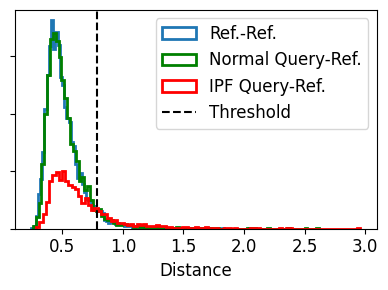

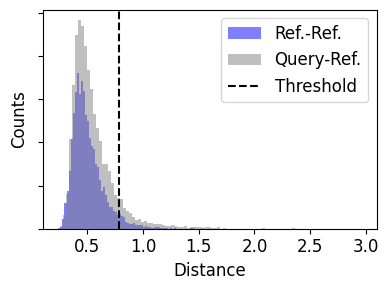

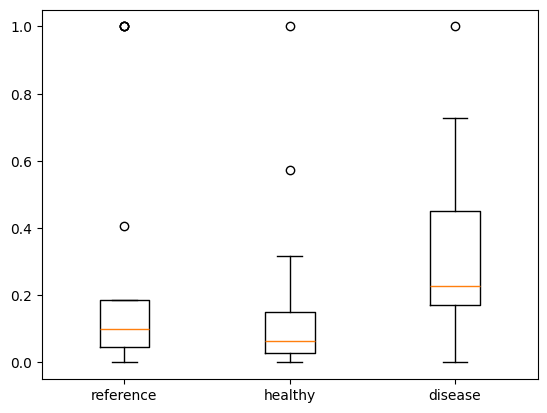

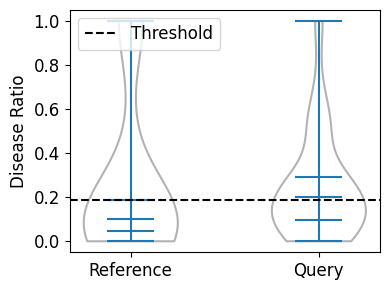

Accuracy: 0.7555555555555555
Precision: 0.8260869565217391
Recall: 0.7307692307692307
F1-score: 0.7755102040816326
==> 1


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 20:52:12,903 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 20:52:18,262 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 20:52:18,457 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-12-20 20:52:32,307 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-12-20 20:52:46,182 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2024-12-20 20:52:58,643 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2024-12-20 20:53:10,139 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2024-12-20 20:

{'n_comps': 4, 'optimal_k': 13, 'optimal_p': 0.030000000000000023, 'threshold': 0.6196610584905523, 'outlier_ratio': 0.07376671277086215, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 11, 'optimal_p': 0.030000000000000023, 'threshold': 0.7916273556621813, 'outlier_ratio': 0.06994665085951393, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial

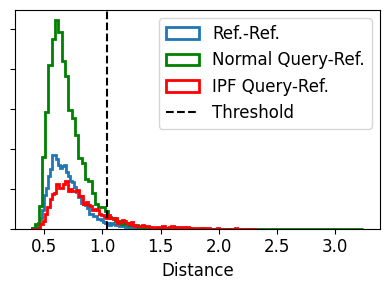

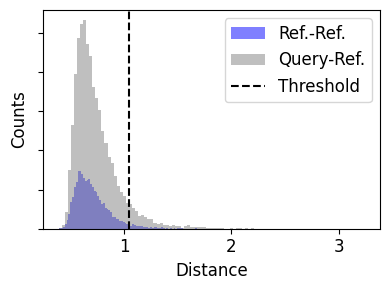

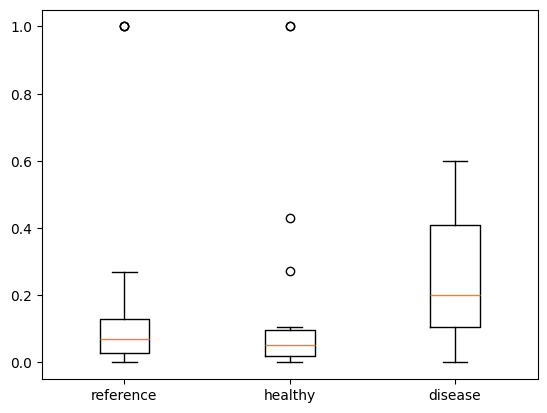

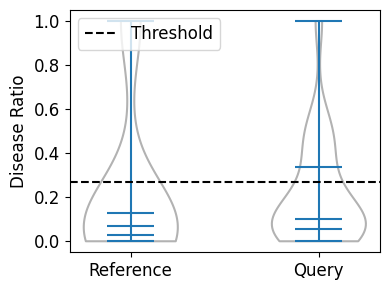

Accuracy: 0.5833333333333334
Precision: 0.7142857142857143
Recall: 0.38461538461538464
F1-score: 0.5
==> 2


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 20:57:01,546 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 20:57:07,212 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 20:57:07,398 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-12-20 20:57:22,397 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-12-20 20:57:37,294 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2024-12-20 20:57:52,229 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2024-12-20 20:58:05,072 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2024-12-20 20:

{'n_comps': 4, 'optimal_k': 36, 'optimal_p': 0.030000000000000023, 'threshold': 0.7843992738900003, 'outlier_ratio': 0.06730150559773516, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 6, 'optimal_p': 0.030000000000000023, 'threshold': 0.7189090815859493, 'outlier_ratio': 0.06993951872345902, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_

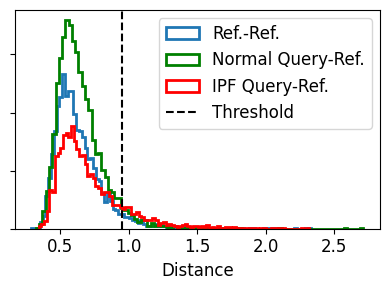

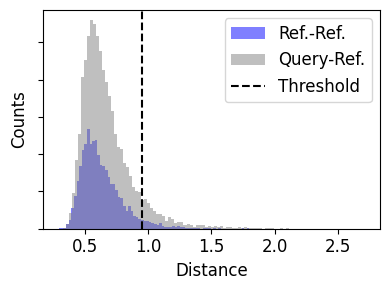

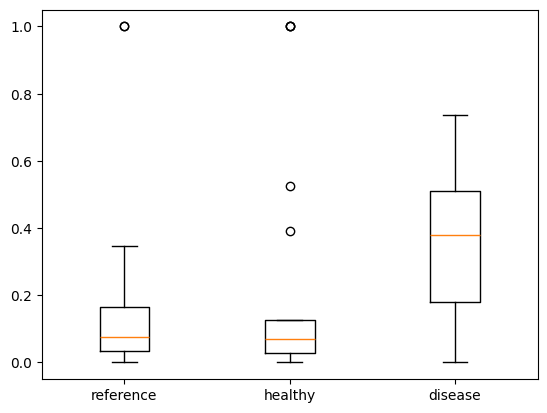

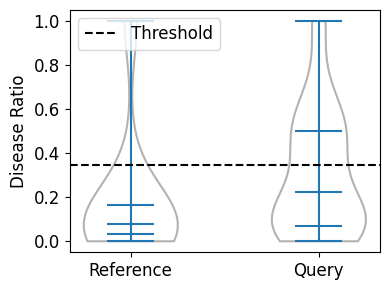

Accuracy: 0.6170212765957447
Precision: 0.7222222222222222
Recall: 0.5
F1-score: 0.5909090909090909
==> 3


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 21:02:29,434 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 21:02:34,033 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 21:02:34,181 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-12-20 21:02:45,176 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-12-20 21:02:57,680 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2024-12-20 21:03:10,682 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2024-12-20 21:03:19,045 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2024-12-20 21:

{'n_comps': 4, 'optimal_k': 13, 'optimal_p': 0.020000000000000014, 'threshold': 0.7014879631234479, 'outlier_ratio': 0.04808090856337561, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 6, 'optimal_p': 0.02500000000000002, 'threshold': 0.7665973461490301, 'outlier_ratio': 0.05371798060184034, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p

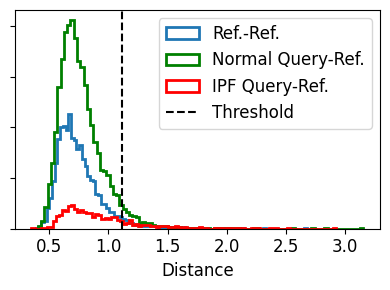

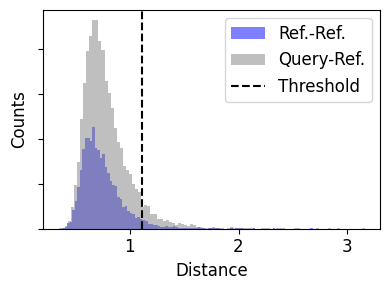

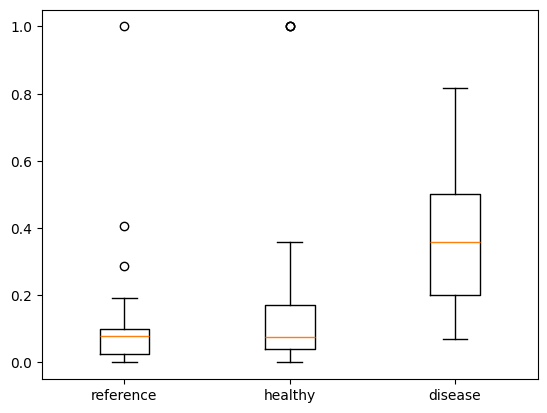

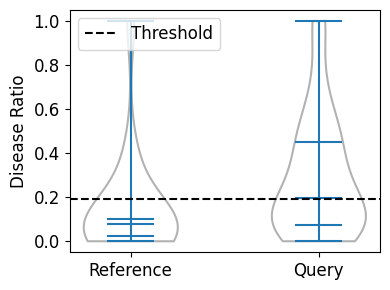

Accuracy: 0.7708333333333334
Precision: 0.7916666666666666
Recall: 0.76
F1-score: 0.7755102040816326
==> 4


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 21:06:37,431 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 21:06:42,505 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 21:06:42,682 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-12-20 21:06:57,243 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-12-20 21:07:10,798 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2024-12-20 21:07:22,309 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2024-12-20 21:07:31,912 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2024-12-20 21:

{'n_comps': 4, 'optimal_k': 14, 'optimal_p': 0.030000000000000023, 'threshold': 0.6139057827653266, 'outlier_ratio': 0.05675146771037182, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 7, 'optimal_p': 0.02500000000000002, 'threshold': 0.7352762209449054, 'outlier_ratio': 0.052412150089338895, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_

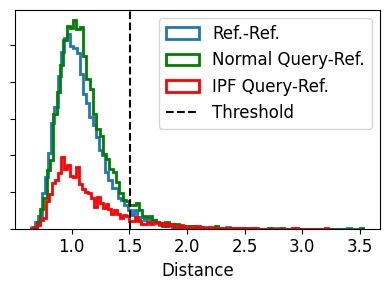

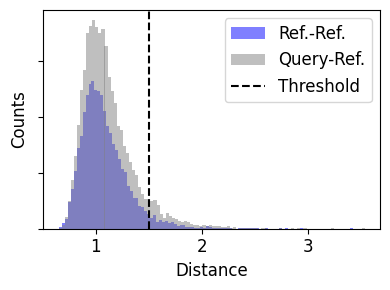

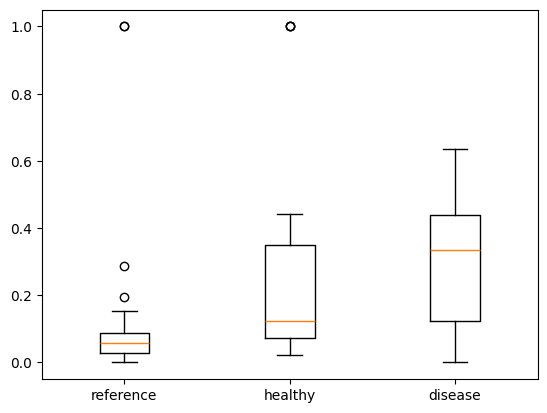

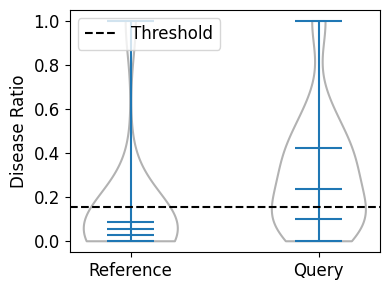

Accuracy: 0.6511627906976745
Precision: 0.6923076923076923
Recall: 0.72
F1-score: 0.7058823529411765
==> 5


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 21:11:56,664 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 21:12:02,356 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 21:12:02,574 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-12-20 21:12:19,562 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-12-20 21:12:35,224 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2024-12-20 21:12:50,578 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2024-12-20 21:13:01,799 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2024-12-20 21:

{'n_comps': 4, 'optimal_k': 6, 'optimal_p': 0.030000000000000023, 'threshold': 0.5088203559908225, 'outlier_ratio': 0.06453956929581187, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 9, 'optimal_p': 0.02500000000000002, 'threshold': 0.7631887318580305, 'outlier_ratio': 0.054828907385387766, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p

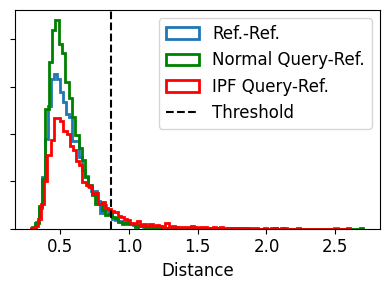

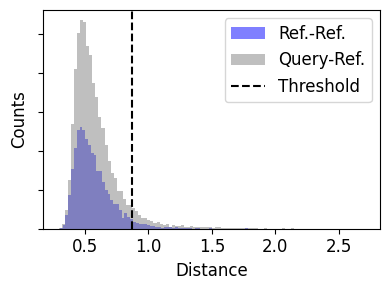

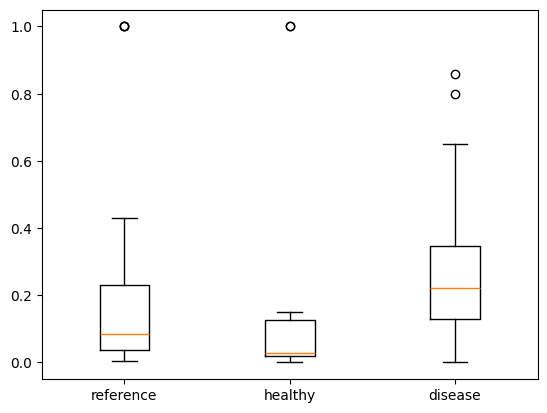

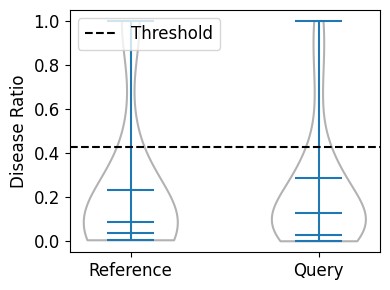

Accuracy: 0.4666666666666667
Precision: 0.6666666666666666
Recall: 0.15384615384615385
F1-score: 0.25
==> 6


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 21:17:45,719 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 21:17:50,916 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 21:17:51,077 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-12-20 21:18:06,289 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-12-20 21:18:21,503 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2024-12-20 21:18:36,029 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2024-12-20 21:18:44,117 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2024-12-20 21:

{'n_comps': 4, 'optimal_k': 16, 'optimal_p': 0.02500000000000002, 'threshold': 0.6072174631909135, 'outlier_ratio': 0.08033633033633034, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 29, 'optimal_p': 0.030000000000000023, 'threshold': 0.8209036877704456, 'outlier_ratio': 0.0984015984015984, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p

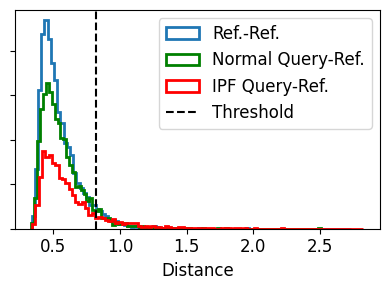

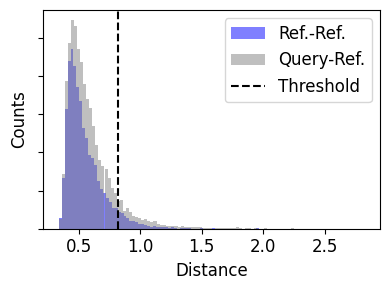

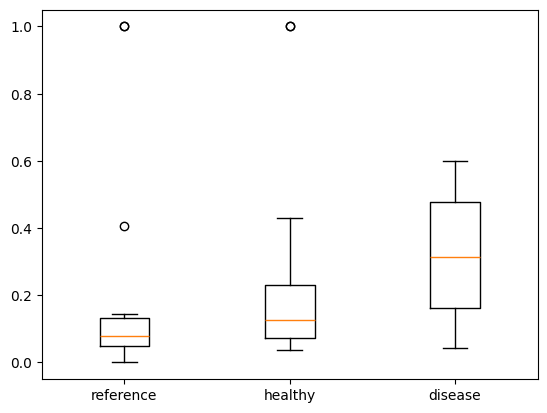

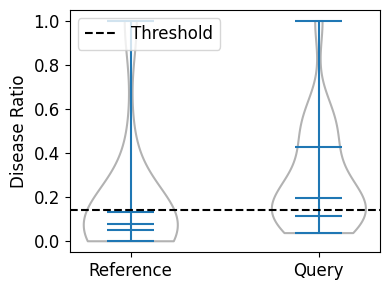

Accuracy: 0.6956521739130435
Precision: 0.6896551724137931
Recall: 0.8
F1-score: 0.7407407407407407
==> 7


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 21:23:31,749 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 21:23:36,871 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 21:23:37,034 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-12-20 21:23:52,308 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-12-20 21:24:07,555 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2024-12-20 21:24:22,598 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2024-12-20 21:24:31,089 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2024-12-20 21:

{'n_comps': 4, 'optimal_k': 19, 'optimal_p': 0.030000000000000023, 'threshold': 0.6349340884954953, 'outlier_ratio': 0.0660961695191524, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 7, 'optimal_p': 0.030000000000000023, 'threshold': 0.7050032168687014, 'outlier_ratio': 0.0589242053789731, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_

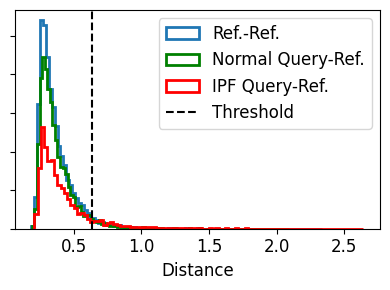

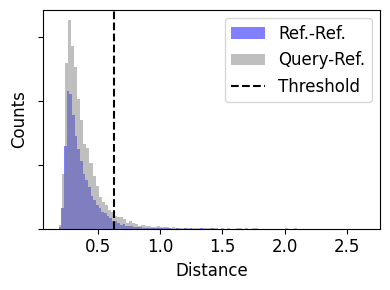

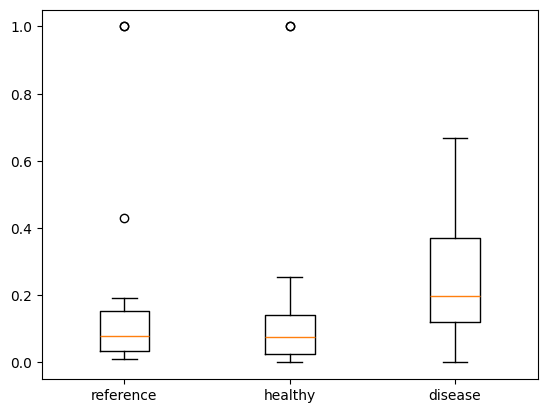

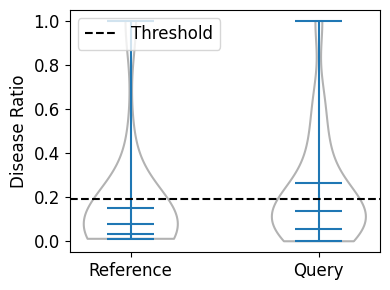

Accuracy: 0.6590909090909091
Precision: 0.8235294117647058
Recall: 0.5384615384615384
F1-score: 0.6511627906976745
==> 8


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 21:29:17,455 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 21:29:23,434 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 21:29:23,629 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-12-20 21:29:39,659 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-12-20 21:29:55,112 - harmonypy - INFO - Iteration 3 of 10
INFO:harmonypy:Iteration 3 of 10
2024-12-20 21:30:09,829 - harmonypy - INFO - Iteration 4 of 10
INFO:harmonypy:Iteration 4 of 10
2024-12-20 21:30:23,902 - harmonypy - INFO - Iteration 5 of 10
INFO:harmonypy:Iteration 5 of 10
2024-12-20 21:

{'n_comps': 4, 'optimal_k': 9, 'optimal_p': 0.030000000000000023, 'threshold': 0.546189461960215, 'outlier_ratio': 0.08273667462211615, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 5, 'optimal_p': 0.030000000000000023, 'threshold': 0.6640932629595278, 'outlier_ratio': 0.08598514982763193, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_

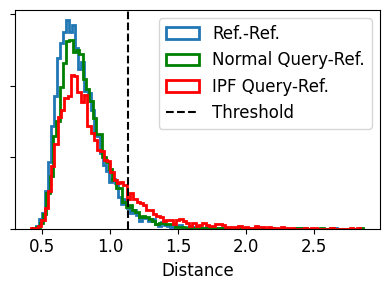

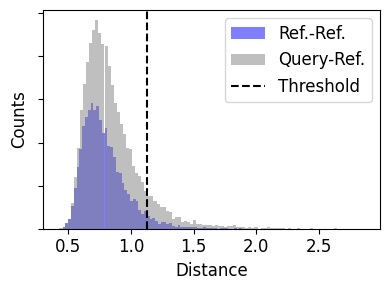

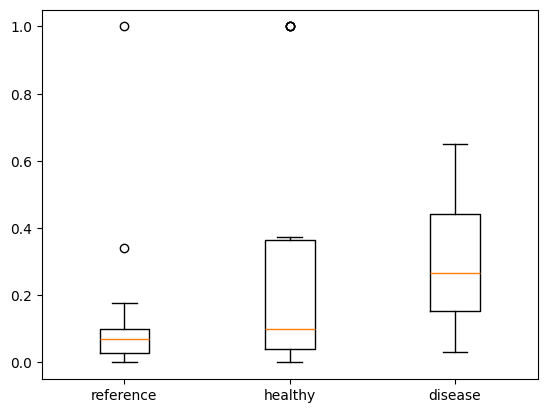

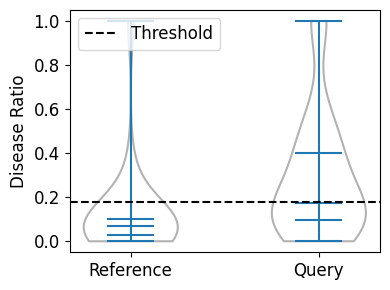

Accuracy: 0.6590909090909091
Precision: 0.7272727272727273
Recall: 0.64
F1-score: 0.6808510638297872
==> 9


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca
2024-12-20 21:35:39,734 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
INFO:harmonypy:Computing initial centroids with sklearn.KMeans...
2024-12-20 21:35:44,813 - harmonypy - INFO - sklearn.KMeans initialization complete.
INFO:harmonypy:sklearn.KMeans initialization complete.
2024-12-20 21:35:44,995 - harmonypy - INFO - Iteration 1 of 10
INFO:harmonypy:Iteration 1 of 10
2024-12-20 21:35:56,758 - harmonypy - INFO - Iteration 2 of 10
INFO:harmonypy:Iteration 2 of 10
2024-12-20 21:36:08,694 - harmonypy - INFO - Converged after 2 iterations
INFO:harmonypy:Converged after 2 iterations


{'n_comps': 4, 'optimal_k': 50, 'optimal_p': 0.04000000000000003, 'threshold': 0.8019277304478578, 'outlier_ratio': 0.12314366761221425, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_p_vals': [0.1, 0.05, 0.01], 'ps': array([0.15 , 0.145, 0.14 , 0.135, 0.13 , 0.125, 0.12 , 0.115, 0.11 ,
       0.105, 0.1  , 0.095, 0.09 , 0.085, 0.08 , 0.075, 0.07 , 0.065,
       0.06 , 0.055, 0.05 , 0.045, 0.04 , 0.035, 0.03 , 0.025, 0.02 ,
       0.015, 0.01 , 0.005, 0.   ])}
{'n_comps': 5, 'optimal_k': 39, 'optimal_p': 0.035000000000000024, 'threshold': 0.9735868178715427, 'outlier_ratio': 0.10729184048056066, 'ks': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]), 'initial_

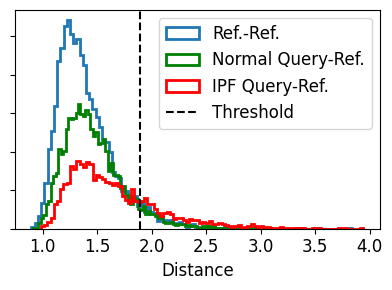

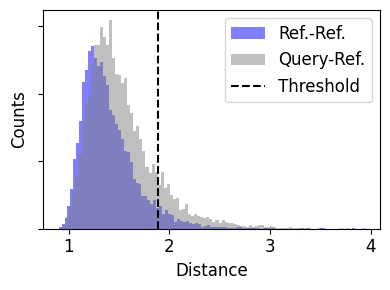

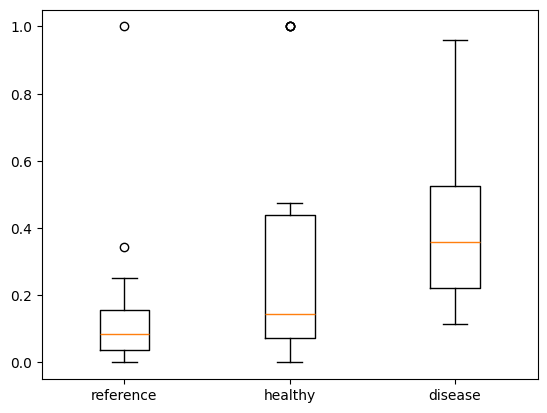

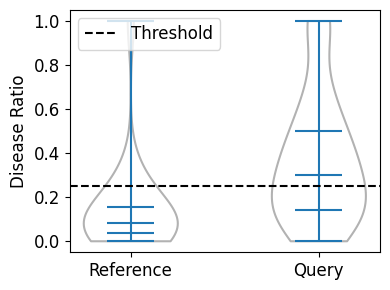

Accuracy: 0.6086956521739131
Precision: 0.6538461538461539
Recall: 0.6538461538461539
F1-score: 0.6538461538461539


In [26]:
import json

for i in range(10):
    print('==>', i)
    seed = i * 100
    Dict = process(seed)
    json.dump(Dict, open(f"{OUTPUT_PATH}/scpss-problem-1/{celltype}/{seed}.json", 'w'), indent=4)

## Integrate pathological scores of cells from each cell type to determine condition of individual

In [27]:
import json

In [28]:
PATH = "/content/drive/MyDrive/Research - Sohel sir/Pathological Cells/Pathological Cell Identification/reproducibility/scpss_data/scpss-problem-1"

In [29]:
celltypes = [
  'Macrophages',
  'AT2',
  'Basal',
  'EC venous',
  'Fibroblasts',
]

In [30]:
my_dict = {}
for celltype in celltypes:
    dicts = []
    for i in range(10):
        fp = f"{PATH}/{celltype}/{i*100}.json"
        with open(fp, 'r') as file:
            data = json.load(file)
        dicts.append(data)
    accs = [d['accuracy'] for d in dicts]
    my_dict[celltype] = accs

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the dictionary by the mean of the values
sorted_dict = {k: v for k, v in sorted(my_dict.items(), key=lambda item: np.mean(item[1]))}

# Define figure size for better readability
fig, ax = plt.subplots(figsize=(4, 3))

# Create a horizontal box plot with sorted values
ax.boxplot(sorted_dict.values(), vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           medianprops=dict(color='red'))

# Set y-axis labels with sorted keys
ax.set_yticklabels(sorted_dict.keys(), fontsize=12)

# Set x-axis label with larger font size
ax.set_xlabel('Accuracy', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Increase tick label size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.xlim([0, 1])

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
for celltype in celltypes:
    print(celltype, np.median(sorted_dict[celltype]), np.mean(sorted_dict[celltype]))

In [ ]:
def get_upper_limit(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    upper_limit_from_data = q1
    for d in data:
        if d < upper_limit and d > upper_limit_from_data:
            upper_limit_from_data = d

    return upper_limit_from_data

In [ ]:
def average_labelling(diseased_portion, upper_limits):
    number = 0
    given_sum = 0
    limit_sum = 0
    for k, v in diseased_portion.items():
        if v is not None:
            number += 1
            given_sum += diseased_portion[k]
            limit_sum += upper_limits[k]

    return max(given_sum - limit_sum, 0) > .2

In [35]:
def average_labelling_score(diseased_portion, upper_limits):
    given_sum = 0
    limit_sum = 0
    for k, v in diseased_portion.items():
        if v is not None:
            given_sum += diseased_portion[k]
            limit_sum += upper_limits[k]
    return max(given_sum - limit_sum, 0)

In [36]:
def any_outlier_labelling(disease_portion, upper_limits):
    for k, v in disease_portion.items():
        if v is not None:
            if disease_portion[k] > upper_limits[k]:
                return True
    return False

In [37]:
def majority_labelling(disease_portion, upper_limits):
    outlier_vote = 0
    inlier_vote = 0
    for k, v in disease_portion.items():
        if v is not None:
            if disease_portion[k] > upper_limits[k]:
                outlier_vote += 1
            else:
                inlier_vote += 1
    return outlier_vote >= inlier_vote

In [38]:
def quick_labelling(disease_portion, upper_limits):
    outlier_vote = 0
    inlier_vote = 0
    for k, v in disease_portion.items():
        if v is not None:
            if disease_portion[k] > upper_limits[k]:
                outlier_vote += 1
            else:
                inlier_vote += 1
    return outlier_vote > 1 and (inlier_vote - outlier_vote) < 3

In [39]:
def priority_labelling(disease_portion, upper_limits):
    for celltype in ('Macrophages', 'EC venous', 'AT2'):
        if disease_portion[celltype] is not None:
            return disease_portion[celltype] > upper_limits[celltype]
    return False

In [40]:
def adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.15):
    number = 0
    given_sum = 0
    limit_sum = 0
    for k, v in disease_portion.items():
        if v is not None:
            number += 1
            if disease_portion[k] > upper_limits[k]:
                given_sum += (1 - inlier_weight) * (disease_portion[k] - upper_limits[k]) / (1 - upper_limits[k])
            else:
                given_sum += inlier_weight * (disease_portion[k] - upper_limits[k]) / upper_limits[k]
    return number != 0 and given_sum > 0.1

In [41]:
def adjusted_average_labelling_score(disease_portion, upper_limits, inlier_weight=.2):
    number = 0
    given_sum = 0
    limit_sum = 0
    for k, v in disease_portion.items():
        if v is not None:
            number += 1
            if disease_portion[k] > upper_limits[k]:
                given_sum += (1 - inlier_weight) * (disease_portion[k] - upper_limits[k]) / (1 - upper_limits[k])
            else:
                given_sum += inlier_weight * (disease_portion[k] - upper_limits[k]) / upper_limits[k]
    return given_sum

## All combos

In [42]:
celltypes = [
    'Macrophages',
    'AT2',
    'Basal',
    'EC venous',
    'Fibroblasts'
]

In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def get_acc_for_test_id(id=0, labelling_fn=quick_labelling, verbose=False):
    dict_of_dicts = {}

    for celltype in celltypes:
        dict_of_dicts[celltype] = json.loads(open(f"{PATH}/{celltype}/{id*100}.json", 'r').read())

    Dict = dict_of_dicts['Macrophages']
    que_samples = Dict['que_samples']
    que_normal_samples = Dict['que_normal_samples']
    que_disease_samples = Dict['que_disease_samples']
    outlier_ratio_que_datasets = Dict['outlier_ratio_que_datasets']
    outlier_ratio_ref_datasets = Dict['outlier_ratio_ref_datasets']

    true_labels = [0] * len(que_normal_samples) + [1] * len(que_disease_samples)

    upper_limits = {}

    def filter_nones(l):
        return [x for x in l if x is not None]

    for celltype in celltypes:
        upper_limits[celltype] = get_upper_limit(filter_nones(dict_of_dicts[celltype]['outlier_ratio_ref_datasets']))

    label = []
    for i, (s, o) in enumerate(zip(que_samples, outlier_ratio_que_datasets)):
        if s in que_normal_samples:
            disease_portion = {}
            for celltype in celltypes:
                disease_portion[celltype] = dict_of_dicts[celltype]['outlier_ratio_que_datasets'][i]
            label.append(labelling_fn(disease_portion, upper_limits))

    for i, (s, o) in enumerate(zip(que_samples, outlier_ratio_que_datasets)):
        if s in que_disease_samples:
            disease_portion = {}
            for celltype in celltypes:
                disease_portion[celltype] = dict_of_dicts[celltype]['outlier_ratio_que_datasets'][i]
            label.append(labelling_fn(disease_portion, upper_limits))

    predicted_labels = label
    accuracy = accuracy_score(true_labels, predicted_labels)
    precision = precision_score(true_labels, predicted_labels)
    recall = recall_score(true_labels, predicted_labels)
    f1 = f1_score(true_labels, predicted_labels)

    if verbose:
        print(id, accuracy, precision, recall, f1)

    return accuracy, precision, recall, f1, predicted_labels

In [44]:
labelling_algos = {
    'Quick': quick_labelling,
    'Priority': priority_labelling,
    'Majority': majority_labelling,
    'Any': any_outlier_labelling,
    'Average': average_labelling,
    'Adjusted Average 0.30': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.3),
    'Adjusted Average 0.25': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.25),
    'Adjusted Average 0.20': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.2),
    'Adjusted Average 0.15': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.15),
    'Adjusted Average 0.10': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.1),
    'Adjusted Average 0.05': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.05),
    'Adjusted Average 0.03': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.03),
    'Adjusted Average 0.02': lambda disease_portion, upper_limits: adjusted_average_labelling(disease_portion, upper_limits, inlier_weight=0.02),
}

In [45]:
accuracies = {}
precisions = {}
recalls = {}
f1s = {}
predicts = {}

for name, labelling_fn in labelling_algos.items():
    accs, pres, recs, fs, pls = [], [], [], [], []
    for i in range(10):
        accuracy, precision, recall, f1, pl = get_acc_for_test_id(i, labelling_fn)
        accs.append(accuracy)
        pres.append(precision)
        recs.append(recall)
        fs.append(f1)
        pls.append(np.mean(pl))

    accuracies[name] = accs
    precisions[name] = pres
    recalls[name] = recs
    f1s[name] = fs
    predicts[name] = pls

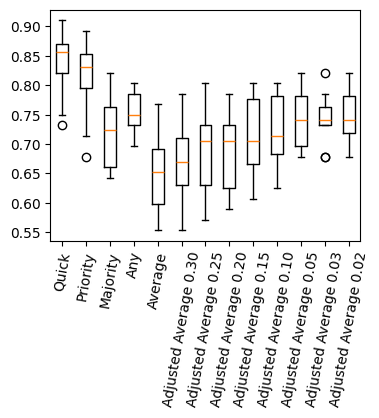

In [46]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.boxplot(accuracies.values())
ax.set_xticklabels(accuracies.keys())
plt.xticks(rotation=80)
plt.show()

In [47]:
for name, acc in accuracies.items():
    print(name, np.median(acc), np.mean(acc))

Quick 0.8571428571428571 0.8357142857142857
Priority 0.8303571428571428 0.8107142857142857
Majority 0.7232142857142857 0.7178571428571429
Any 0.75 0.7553571428571428
Average 0.6517857142857143 0.6535714285714287
Adjusted Average 0.30 0.6696428571428572 0.6660714285714285
Adjusted Average 0.25 0.7053571428571428 0.6857142857142857
Adjusted Average 0.20 0.7053571428571428 0.6874999999999999
Adjusted Average 0.15 0.7053571428571428 0.7107142857142856
Adjusted Average 0.10 0.7142857142857142 0.7250000000000001
Adjusted Average 0.05 0.7410714285714286 0.7428571428571428
Adjusted Average 0.03 0.7410714285714286 0.7428571428571428
Adjusted Average 0.02 0.7410714285714286 0.7446428571428572


In [48]:
print_dict_comb = {}

for name, acc in sorted_dict.items():
    print_dict_comb[name] = acc

print_dict_comb['All'] = accuracies['Quick']

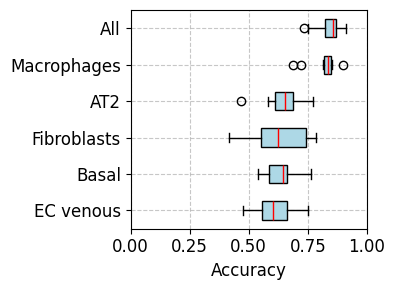

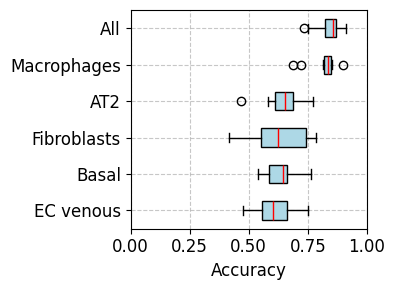

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the dictionary by the mean of the values
sorted_dict = {k: v for k, v in sorted(print_dict_comb.items(), key=lambda item: np.mean(item[1]))}

# Define figure size for better readability
fig, ax = plt.subplots(figsize=(4, 3))

# Create a horizontal box plot with sorted values
ax.boxplot(print_dict_comb.values(), vert=False, patch_artist=True,
           boxprops=dict(facecolor='lightblue', color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           medianprops=dict(color='red'))

# Set y-axis labels with sorted keys
ax.set_yticklabels(print_dict_comb.keys(), fontsize=12)

# Set x-axis label with larger font size
ax.set_xlabel('Accuracy', fontsize=12)

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.7)

# Increase tick label size
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

plt.xlim([0, 1])

# Tight layout for better spacing
plt.tight_layout()

plt.savefig('accuracy_unsupervised.svg')

# Show the plot
plt.show()
